In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from skimage import io
from matplotlib import cm
%matplotlib inline

In [3]:
lat_min, lat_max = 31.1, 31.4
lon_min, lon_max = 121.3, 121.8
lat_ctr = (int)((lat_max - lat_min) / 0.005)
lon_ctr = (int)((lon_max - lon_min) / 0.005)

def lat_quantize(lat):
    return (int)((lat - lat_min) / 0.005)
def lon_quantize(lon):
    return (int)((lon - lon_min) / 0.005)

In [16]:
def extract_hist(data):
    hist, xedges, yedges = np.histogram2d(data['lat'], data['lon'],
        bins = [range(lat_ctr),
                range(lon_ctr)],
        range=[[0, lat_ctr],
               [0, lon_ctr]])
    hist = hist.astype("int")
    return hist

In [5]:
def get_density_hour(data, hour_begin, hour_end):
    data_hour = data[(hour_begin <= data['date_time']) & (data['date_time'] < hour_end)]
    data_hour['lat'] = data_hour['lat'].apply(lambda lat:
        (int)((lat-lat_min) / 0.005))
    data_hour['lon'] = data_hour['lon'].apply(lambda lon:
        (int)((lon-lon_min) / 0.005))
    data_hour = data_hour.drop_duplicates(['car_id', 'lat', 'lon'])
    hist  = extract_hist(data_hour)
    return hist

In [6]:
def get_range_density(hist, range_xy):
    center_lat = lat_quantize((range_xy[0][0] + range_xy[0][1]) / 2)
    center_lon = lon_quantize((range_xy[1][0] + range_xy[1][1]) / 2)
    return (int)(hist[center_lat][center_lon])

In [7]:
def convert_str_range(string):
    string_split = string.split('~')
    return list(map(float, string_split))
def get_submission_range():
    X_sub = pd.read_csv("./A-test.csv")
    X_sub['latitude_range'] = X_sub['latitude_range'].apply(convert_str_range)
    X_sub['longitude_range'] = X_sub['longitude_range'].apply(convert_str_range)
    return X_sub

In [8]:
def get_dataset():
    frames = []
    features_need = ['car_id', 'date_time', 'lat', 'lon']
    rcar_dtype = {'car_id': str,
                  'date_time': str,
                  'lat': float,
                  'lon': float,
                  'power_mode': str,
                  'mileage': float,
                  'speed': float,
                  'fuel_consumption': float}
    ecar_dtype = {'car_id': str,
                  'date_time': str,
                  'lat': float,
                  'lon': float,
                  'work_mode': str,
                  'mileage': float,
                  'speed': float,
                  'avg_fuel_consumption': float,
                  'system_mode': str}
    for part in range(3):
        filename = ("./data/rcar/BOT_data_rcar_20170306_20170306_part{}.csv"
                    .format(part))
        data_part = pd.read_csv(filename, dtype=rcar_dtype)[features_need]
        data_part = data_part[(data_part['lat'] > 0.1) & (data_part['lon'] > 0.1)]
        frames.append(data_part)
        
        filename = ("./data/ecar/BOT_data_ecar_20170306_20170306_part{}.csv"
                    .format(part))
        data_part = pd.read_csv(filename, dtype={'system_mode': str})[features_need]
        data_part = data_part[(data_part['lat'] > 0.1) & (data_part['lon'] > 0.1)]
        frames.append(data_part)
        
    data = pd.concat(frames)
    data["date_time"] = data["date_time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
    return data

In [10]:
rcar_dtype = {'car_id': str,
                  'date_time': str,
                  'lat': float,
                  'lon': float,
                  'power_mode': str,
                  'mileage': float,
                  'speed': float,
                  'fuel_consumption': float}
ecar_dtype = {'car_id': str,
                  'date_time': str,
                  'lat': float,
                  'lon': float,
                  'work_mode': str,
                  'mileage': float,
                  'speed': float,
                  'avg_fuel_consumption': float,
                  'system_mode': str}

In [11]:
data = pd.read_csv("./data/rcar/BOT_data_rcar_20170102_20170102_part0.csv", dtype=rcar_dtype)
data = data[(data['lat'] > 0.1) & (data['lon'] > 0.1)]
data["date_time"] = data["date_time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

/home/jachinshen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jachinshen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


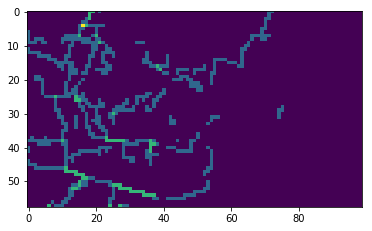

/opt/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: ./fig/test.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:126: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/opt/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:179: UserWarning: Downcasting int64 to uint8 without scaling because max value 3 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [17]:
hist = get_density_hour(data, datetime(2017, 1, 2, 13), datetime(2017, 1, 2, 14))
plt.imshow(hist)
plt.show()
io.imsave("./fig/test.jpg", hist)